# Lesson 3

This lesson will cover the following topics: 

1. Advanced numpy and matplotlib
2. Using pandas to create indexable dictionaries
3. Understanding and using dataframes 
4. Transforming data using np and pandas
5. Importing data from CSV/Excel

NumPy allows for many useful packages, and as scientists and engineers one of the most useful is the ```linalg``` package.

This package provides us with many prewritten functions to perform linear algebra operations.

In [2]:
import numpy as np

In [101]:
#create a 4x4 matrix with random numbers
matrix = np.random.randn(4, 4)

print(matrix)

[[-3.74969515e+00 -3.74694056e-01 -9.93828231e-01 -1.11855814e+00]
 [-1.11144595e-04 -8.28451084e-01  1.56697432e+00 -9.18033953e-01]
 [ 1.42200303e+00  9.54787459e-01  8.89556755e-01 -4.73378821e-01]
 [ 2.37750157e-01  9.05049238e-01 -1.52144508e-01  1.08018036e+00]]


We can calculate the inverse of a matrix by calling the ```inv()``` function from the ```linalg``` package as follows:

In [102]:
inv = np.linalg.inv(matrix)

print(inv)

[[-0.25865124 -0.2621861   0.09616364 -0.44852728]
 [ 0.26336915 -0.14619644  0.62392934  0.42190672]
 [ 0.04718872  0.72637412  0.01220957  0.67155376]
 [-0.15709245  0.2825117  -0.54221692  0.76557983]]


To prove that it is in fact the inverse of the matrix we can multiply ```inv``` and ```matrix``` whose result should be the identity matrix.

In [103]:
experimental_identity = np.matmul(matrix, inv)
print(experimental_identity)

[[ 1.00000000e+00 -8.13930459e-17  3.25337759e-17 -3.21144839e-16]
 [ 1.39380291e-17  1.00000000e+00  7.52153765e-17  2.23060514e-17]
 [-1.89260649e-17 -9.78630918e-17  1.00000000e+00  4.98299210e-17]
 [-5.52249589e-17  4.83431218e-17 -1.20905617e-16  1.00000000e+00]]


We can see that this is close to the identity matrix to the degree of some rounding errors off of the main diagonal, so all the values off the diagonal are really close to zero, with the values on the diagonal being equal to 1. But what if we wanted NumPy to check for us? Then we can use the ```allclose()``` function to check if all the values in one matrix are close to some degree to another matrix. 

First we have to have an identity matrix to which we can compare ```experimental_identity```. For this we can use the ```eye()``` function. This function creates a 2-dimensional array with 1's on the diagonal and 0's everywhere else.

In [5]:
true_identity = np.eye(4)
print(true_identity)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Now we can compare ```experimental_identity``` and ```true_identity```, which does not contain the rounding errors, but is close enough to the identity matrix. 

In [7]:
print(np.allclose(experimental_identity, true_identity))

True


The ```numpy``` and ```linalg``` packages also allows some basic but usually tedious linear algebra operations should we have to code them ourselves. These operations include but are not limited to:

```sum()```: calculates the elementwise sum of a matrix (sum of all of its entities)

```trace()```: calculates the trace of a matrix (the sum of its diagonal entities)

```det()```: calculates the determinant of a matrix (which corresponds to how that matrix scales other data.  For a square matrix abcd, determinant is ad-cd) 

```norm()```: calculates the norm of a matrix or vector, which is a useful function for comparing matrices.





In [104]:
matrix = np.random.randint(5, size=(2,2))
matrix_sum = np.sum(matrix)
matrix_trace = np.trace(matrix)
matrix_det = np.linalg.det(matrix)

In [105]:
print(matrix)
print(matrix_sum)
print(matrix_trace)
print(matrix_det)

[[4 2]
 [2 0]]
8
4
-4.0


In [10]:
a = np.array([5, 5])
b = np.array([1, 2])
print(np.linalg.norm(a))
print(np.linalg.norm(b))

7.0710678118654755
2.23606797749979


This allows us to quickly calculate the distance between two data points, as data points are represented as vectors. 


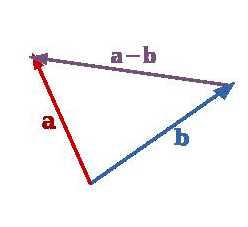

In [11]:
print(np.linalg.norm(a-b))

5.0


This above line of code is one of the fundamental principles of machine learning and optimization tasks. When we are training a machine to perform a task well we are asking it to predict an answer. Then we compare its prediction to some data to which we know the correct answer (what we call training data). Then, depending on how close its prediction is, the machine updates itself and tries again until it converges closer to the answer. Thus, the goal of machine learning is minimizing the distance between the prediction of the machine and the true answer.

## Advanced Numpy : Matplotlib

One reason for Ipython’s popularity in analytical computing is that it integrates well with data visualization and other user interface libraries like matplotlib. Matplotlib is a desktop plotting package designed for creating most two dimensional publication quality plots.

The  %matplotlib  magic function configures its integration with the Ipython shell or Jupyter notebook. This is important, as otherwise plots will either not appear(notebook) or take control of the session until closed(shell).

[0 1 2 3 4 5 6 7 8 9]


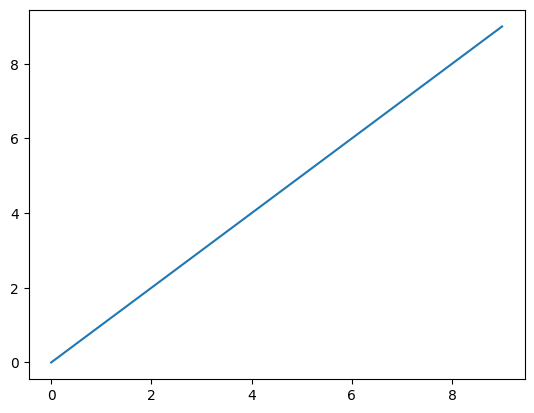

In [3]:
import matplotlib.pyplot as plt
import numpy as np
data = np.arange(10)
print(data)
plt.plot(data)
plt.show()

Plots in matplotlib reside within a Figure object. We can create a new figure and subplots as below :

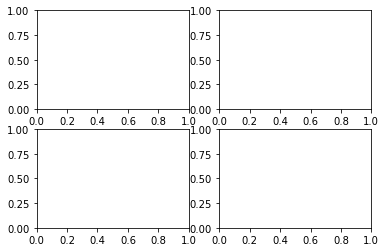

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot( 2, 2, 1)  # here 2,2 represents number of plots that is 2*2 = 4 and 1 represents the position of the plot, in this case the first plot.
ax2 = fig.add_subplot( 2, 2, 2)
ax2 = fig.add_subplot( 2, 2, 3)
ax2 = fig.add_subplot( 2, 2, 4)

Behavior of the subplots can be defined as follows:

* nrows : Number of rows of subplots
* ncolumns :  Number of columns of subplots
* sharex : All subplots should use the same x-axis ticks(adjusting the xlim will affect all subplots)
* sharey : All subplots should use the same y-axis ticks(adjusting the ylim will affect all subplots)
* subplot_kw : Dict of keywords passed to add_subplot call used to create each subplot.
* **fig_kw : Additional keywords to subplots are used when creating the figure, such as plt.subplot(2, 2, figsize=(8, 6))

** Subplots_adjust : ** Used to create padding around subplots and spacing between subplots. <br>

<code> subplots_adjust(left = None, right=None, top=None, bottom=None, wspace=None, hspace=None) </code> <br>

where wspace and hspace controls the percent of the figure width and figure height, respectively, to use as spacing between subplots. <br>
Example : 

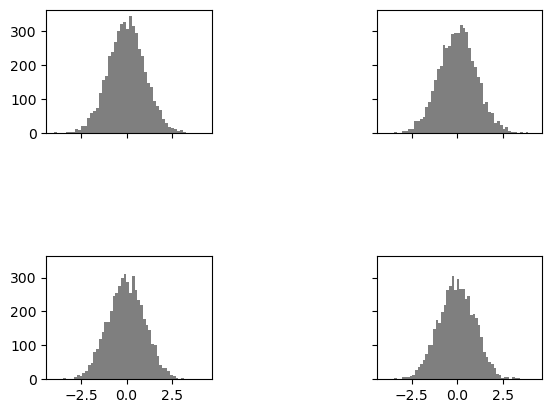

In [108]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(5000), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=1, hspace=1)

** Colors: **
Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and style. <br>

For example, to plot x versus y with green dashes, there are two ways: 

<code> ax.plot(x, y, 'g--') </code>
or 
<code> ax.plot(x, y, linestyle = '--', color = 'g') </code>


** Markers: **
Line plots can additionally have markers to highlight the actual data points. Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. 
<br> Marker can be part of the style string, which must have color followed by marker type and line style

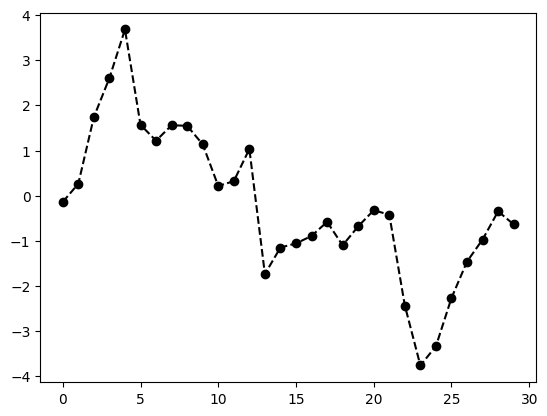

In [6]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

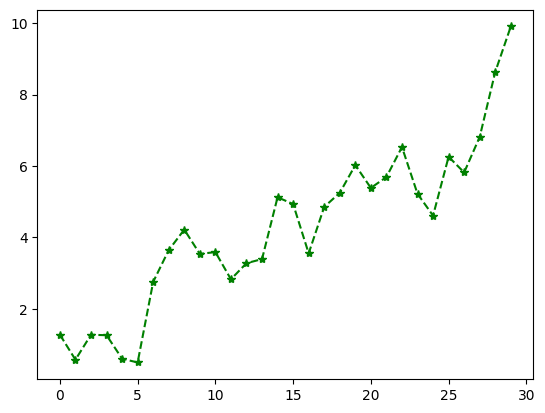

In [7]:
plt.plot(randn(30).cumsum(), color = 'g', linestyle = 'dashed', marker = '*')

** Ticks and Labels: **
The pyplot interface designed for interactive use, consists of methods like xlim, xticks, and xticklabels. These control the plot range, tick locations and tick labels, respectively. They can be used in two ways: <br>
* Called with no arguments returns the current parameter value( e.g., plt.xlim() returns the current x-axis plotting range)
* Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10).

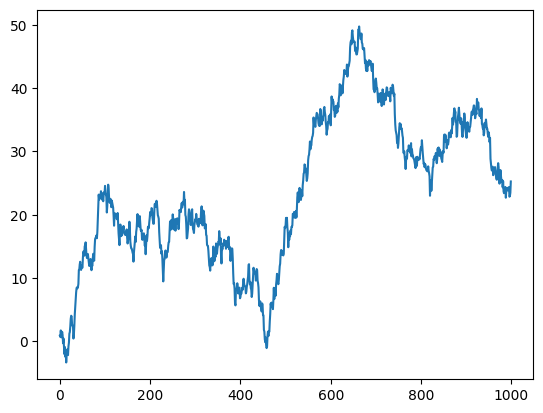

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

** Legends: **
Legends are another critical element for identifying plot elements. There are couple of ways to add one. The easiest is to pass the label argument when adding each piece of the plot:



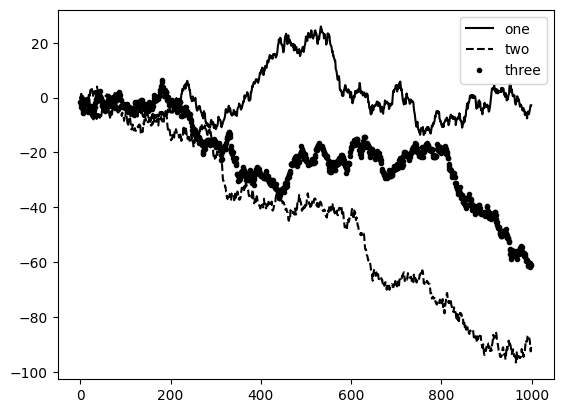

In [9]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000). cumsum(), 'k', label = 'one')
ax.plot(randn(1000). cumsum(), 'k--', label = 'two')
ax.plot(randn(1000). cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best') # to automatically create the legend for the plot.

** Annotations: **
In addition to the standard plots, text, arrows or other shapes are used to customize the plot annotations. ‘Text’ draws text at a given coordinates(x,y) on the plot with optional custome styling: <br>
<code> ax.text(x,y, ‘Hello World!’, family = ‘monospace’, fontsize =10) </code>

Similarly, arrows along with the text can be arranged appropriately. There is another method called ‘ax.annotate’, this method can draw labels at the indicated x and y coordinates. Here we use set_xlim and set_ylim methods to manually set the start and end boundaries for the plot rather than matplotlib’s default. To add main title of the plot, we use ax.set_title.   

Drawing shapes requires some more care. Matplotlib has objects that represent many common shapes, referred to as “Patches”. Some of these likes rectangle and circle are found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

** Saving Plots **
You can save the active figure to file using plt.savefig. This method is equivalent to the figure object’s savefig instance method. For example, to save an SVG version of a figure, you need only type: <br>
<code> plt.savefig(‘figpath.svg’) </code>

The file type is inferred from the file extension, like .pdf for PDF files. Two more important options that are used frequently for publishing graphics are dpi and bbox_inches, which controls the dots-per-inch resolution and can trim the whitespace around the actual figure respectively. 

<code> plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight') </code>

## Pandas

Pandas is the fundamental package for data manipulation and analysis in Python:
- Extremely useful for doing anything with data, from simple Excel style operations to complex SQL-style data manipulations
- Built on top of NumPy
- It is conventional to import Pandas as "pd"

For more information about Pandas:
https://pandas.pydata.org


# Data Structures

The two most versatile data structures in Pandas are ```Series``` and ```DataFrame``` which are built on top of NumPy. So, before starting, we need to import the ```NumPy``` and ```Pandas``` libraries

In [10]:
# import the numpy and pandas libraries and aliasing as np and pd respectively

import numpy as np
import pandas as pd

## Series

A series is a one-dimensional object and can be created using various inputs like ```Array```, ```Dict```, and ```Scalar value or constant```. By default, each value in a series will receive an index from 0 to N-1, which N is the length of the data.

In [11]:
# example of creating a simple series
MySeries = pd.Series ([3.14, "python", -10, 'BC34'])
print (MySeries)

0      3.14
1    python
2       -10
3      BC34
dtype: object


You can specify an index to each data in the series like below:

In [12]:
MySeries2 = pd.Series ( [3.14, "python", -10, 'BC34'], 
                 index=['A', 'B', 'C', 'D'])
print (MySeries2)

A      3.14
B    python
C       -10
D      BC34
dtype: object


In [13]:
MySeries2.values

array([3.14, 'python', -10, 'BC34'], dtype=object)

Using index for calling values in a series.

In [14]:
print(MySeries2[['C','B',]])   # Using index for calling values in a series.

print(MySeries[[0,2]])

C       -10
B    python
dtype: object
0    3.14
2     -10
dtype: object


### Creating a series by passing the dictionary

In [15]:
Data = {'Name': ['Bob', 'John', 'Mary'], 'Age': [15, 23, 17], 'Color': ['white', 'black', 'black']}

Sdata = pd.Series(Data)
print (Sdata)

Name         [Bob, John, Mary]
Age               [15, 23, 17]
Color    [white, black, black]
dtype: object


In this example, the dict' s keys are indexes in Data. So you can recall values by using these keys:

In [17]:
Features = ['Name', 'Age']

Sdata2 = pd.Series (Data, index = Features)
print (Sdata2)

Name    [Bob, John, Mary]
Age          [15, 23, 17]
dtype: object


In [18]:
Features = ['Name', 'Age', 'Color', 'Weight']

Sdata2 = pd.Series (Data, index = Features)
print (Sdata2)

Name          [Bob, John, Mary]
Age                [15, 23, 17]
Color     [white, black, black]
Weight                      NaN
dtype: object


Note: Since we do not have any value for ```Weight``` in 'Data' dictionary, it appears as NaN. This kind of data is considered as 'missing data' or 'NA values'.

In big data, detecting missing data is essential. For this purpose, The ```isnull``` and ```notnull``` functions should be used.

In [19]:
pd.isnull(Sdata2)

Name      False
Age       False
Color     False
Weight     True
dtype: bool

In [20]:
pd.notnull(Sdata2)

Name       True
Age        True
Color      True
Weight    False
dtype: bool

In [21]:
# Retrieve some elements from a series

Ser = pd.Series ([10,20,30,40,50,60,70], index = ['a','b','c','d','e','f','g'])

print (Ser[1:5])
print (Ser[3:4])

b    20
c    30
d    40
e    50
dtype: int64
d    40
dtype: int64


In [22]:
print (Ser[-3:])

e    50
f    60
g    70
dtype: int64


In [23]:
#Retrieve data using index

print (Ser [['a','d','f','g']])

a    10
d    40
f    60
g    70
dtype: int64


### Creating a series by passing the scalar

If data is a scalar value, the value will be repeated to the number of indexes. The important point is, an index must be provided in the series.

In [24]:
Ser = pd.Series (23 , index = [0,1,2,3,4])
print (Ser)

0    23
1    23
2    23
3    23
4    23
dtype: int64


We can use a function to define the index, <code>range(8)</code>, and and <code>dtype</code> to determine the data type.

In [25]:
Ser = pd.Series (23, index = range(8), dtype=float)
print (Ser)

0    23.0
1    23.0
2    23.0
3    23.0
4    23.0
5    23.0
6    23.0
7    23.0
dtype: float64


## Basic Functionality in Series

```axes``` Returns a list of the row axis labels.

```dtype``` Returns the dtype of the object.

```empty``` Returns True if series is empty.

```ndim```  Returns the number of dimensions of the underlying data.

```size``` Returns the number of elements in the underlying data.

```values``` Returns the Series as ndarray.

```head()``` Returns the first n rows.

```tail()``` Returns the last n rows.



(Reference :www.tutorialspoint.com/python_pandas)

#### The structure of using these functions is like below:

#### NameSeries.```function```

In [116]:
# Some example of using functions in Series:


Ser = pd.Series ([10,20,30,40,50,60,70, 80], index = ['a','b','c','d','e','f','g','h'])

print ("The axes are: ")
print (Ser.axes)

print ("The dimentions of the object is: ")
print (Ser.ndim)

print ("The size of the object is: ")
print (Ser.size)

print ("The data in the Series is: ")
print (Ser.values)

print ("The first 4 rows of the data series: ")
print (Ser.head(4))

print ("The last 2 rows of the data series: ")
print (Ser.tail(2))


The axes are: 
[Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')]
The dimentions of the object is: 
1
The size of the object is: 
8
The data in the Series is: 
[10 20 30 40 50 60 70 80]
The first 4 rows of the data series: 
a    10
b    20
c    30
d    40
dtype: int64
The last 2 rows of the data series: 
g    70
h    80
dtype: int64


## DataFrame

A ```DataFrame``` is a two-dimensional data structure resembling a table consisting of an ordered collection of columns, each of which could be of a different value type. A ```DataFrame``` has both row and column indexes.  One can compare a DataFrame to an excel sheet, in that it contains data in a very similar structure.

A ```DataFrame``` can be created using various inputs like: ```List```, ```Dictionary```, ```Series```, and ```Numpy ndarrays```. 

### Creating a DataFrame by passing a Lists

In [117]:
Data = [100, 120, 130, 140, 150]

df = pd.DataFrame(Data)
df

,0
0,100
1,120
2,130
3,140
4,150


In [125]:
raw_data = [['Bruce','Banner',38,4,25,0],['Tony','Stark',42,24,94,0],['Hal','Jordan',25,31,57,0],['Bruce','Wayne',32,2,62,0],
            ['Clark','Kent',28,3,70,0]]
df = pd.DataFrame (raw_data, columns = ['first_name', 'last_name','age','preTestScore','postTestScore','weight'])
df

,first_name,last_name,age,preTestScore,postTestScore,weight
0,Bruce,Banner,38,4,25,0
1,Tony,Stark,42,24,94,0
2,Hal,Jordan,25,31,57,0
3,Bruce,Wayne,32,2,62,0
4,Clark,Kent,28,3,70,0


### Creating a DataFrame by passing a dictionary

In [129]:
raw_data = {'first_name': ['Bruce','Tony','Hal','Bruce','Clark'], 'last_name': ['Banner','Stark','Jordan','Wayne','Kent'], 
           'age': [38,42,25,32,28], 'preTestScore': [4,24,31,2,3], 'postTestScore': [25,94,57,62,70],'weight':[0,0,0,0,0]}

df = pd.DataFrame (raw_data , index = ['rank1','rank2','rank3','rank4','rank5'])
df

print(df['first_name'])

rank1    Bruce
rank2     Tony
rank3      Hal
rank4    Bruce
rank5    Clark
Name: first_name, dtype: object


In [131]:
# Create a DataFrame from list of dicts

Data = [{'first_attempt':12, 'second_attempt':10.78,}, 
        {'first_attempt':14.1, 'second_attempt':13.2, 'third_attempt':12},
       {'first_attempt':12, 'second_attempt':15.78,'third_attempt':12,'fourth_attempt':3}
       ]

df = pd.DataFrame (Data)
df

,first_attempt,second_attempt,third_attempt,fourth_attempt
0,12.0,10.78,NaN,NaN
1,14.1,13.20,12.0,NaN
2,12.0,15.78,12.0,3.0


In [132]:
# define index - we define a particular index to label specific rows

df = pd.DataFrame (Data, index = ['score1','score2','score3'])
df

,first_attempt,second_attempt,third_attempt,fourth_attempt
score1,12.0,10.78,NaN,NaN
score2,14.1,13.20,12.0,NaN
score3,12.0,15.78,12.0,3.0


### Creating a DataFrame from Dict of Series

In [30]:

Data = {'first' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'second' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(Data)
df

,first,second
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


### Column Addition

In [136]:
raw_data = {'first_name': ['Bruce','Tony','Hal','Bruce','Clark','Clark'], 'last_name': ['Banner','Stark','Jordan','Wayne','Kent','Clark'], 
           'age': [38,42,25,32,28,0], 'preTestScore': [4,24,31,2,3,0], 'postTestScore': [25,94,57,62,70,0]}
df = pd.DataFrame (raw_data , index = ['rank1','rank2','rank3','rank4','rank5','rank6'])

print ("Original data: ")

df

Original data: 


,first_name,last_name,age,preTestScore,postTestScore
rank1,Bruce,Banner,38,4,25
rank2,Tony,Stark,42,24,94
rank3,Hal,Jordan,25,31,57
rank4,Bruce,Wayne,32,2,62
rank5,Clark,Kent,28,3,70
rank6,Clark,Clark,0,0,0


In [137]:
# adding a new column to an existing columns in DataFrame object

date = [2017, 2018,2017,np.nan,2015,2019]
df["date"] = date
print ("New DataFrame after inserting the 'date' column")
df

New DataFrame after inserting the 'date' column


,first_name,last_name,age,preTestScore,postTestScore,date
rank1,Bruce,Banner,38,4,25,2017.0
rank2,Tony,Stark,42,24,94,2018.0
rank3,Hal,Jordan,25,31,57,2017.0
rank4,Bruce,Wayne,32,2,62,NaN
rank5,Clark,Kent,28,3,70,2015.0
rank6,Clark,Clark,0,0,0,2019.0


In [139]:
date = [2017, 2018,2017,np.nan,2015,2020]
df["date"] = date
df

,first_name,last_name,age,preTestScore,postTestScore,date
rank1,Bruce,Banner,38,4,25,2017.0
rank2,Tony,Stark,42,24,94,2018.0
rank3,Hal,Jordan,25,31,57,2017.0
rank4,Bruce,Wayne,32,2,62,NaN
rank5,Clark,Kent,28,3,70,2015.0
rank6,Clark,Clark,0,0,0,2020.0


In [140]:
date = [2017, 2018,2017,np.nan,2015,2016]
df["date"] = date
df

,first_name,last_name,age,preTestScore,postTestScore,date
rank1,Bruce,Banner,38,4,25,2017.0
rank2,Tony,Stark,42,24,94,2018.0
rank3,Hal,Jordan,25,31,57,2017.0
rank4,Bruce,Wayne,32,2,62,NaN
rank5,Clark,Kent,28,3,70,2015.0
rank6,Clark,Clark,0,0,0,2016.0


In [141]:
date = [2017, 2018,2017,np.nan,2015,2016]
df["age"] = date
df

,first_name,last_name,age,preTestScore,postTestScore,date
rank1,Bruce,Banner,2017.0,4,25,2017.0
rank2,Tony,Stark,2018.0,24,94,2018.0
rank3,Hal,Jordan,2017.0,31,57,2017.0
rank4,Bruce,Wayne,NaN,2,62,NaN
rank5,Clark,Kent,2015.0,3,70,2015.0
rank6,Clark,Clark,2016.0,0,0,2016.0


In [146]:
Data = {'first' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'second' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df2 = pd.DataFrame(Data)
print (df2)

# adding a new column to an existing columns in DataFrame object

df2 ['third'] = pd.Series([100,200,300,400], index = ['a','b','c','d'])

print ("New DataFrame after inserting the 'third' column")

print (df2)

df2 ['fourth'] = pd.Series([100,200,300], index = ['a','b','c'])

print (df2)

df2['fifth'] = pd.Series([500], index = ['d'])

print (df2)

   first  second
a    1.0       1
b    2.0       2
c    3.0       3
d    NaN       4
New DataFrame after inserting the 'third' column
   first  second  third
a    1.0       1    100
b    2.0       2    200
c    3.0       3    300
d    NaN       4    400
   first  second  third  fourth
a    1.0       1    100   100.0
b    2.0       2    200   200.0
c    3.0       3    300   300.0
d    NaN       4    400     NaN
   first  second  third  fourth  fifth
a    1.0       1    100   100.0    NaN
b    2.0       2    200   200.0    NaN
c    3.0       3    300   300.0    NaN
d    NaN       4    400     NaN  500.0


### Retrieving Columns and Rows as Series

In [48]:
raw_data = {'first_name': ['Bruce','Tony','Hal','Bruce','Clark'], 'last_name': ['Banner','Stark','Jordan','Wayne','Kent'], 
           'age': [38,42,25,32,28], 'preTestScore': [4,24,31,2,3], 'postTestScore': [25,94,57,62,70]}
df = pd.DataFrame (raw_data , index = ['rank1','rank2','rank3','rank4','rank5'])
df

,first_name,last_name,age,preTestScore,postTestScore
rank1,Bruce,Banner,38,4,25
rank2,Tony,Stark,42,24,94
rank3,Hal,Jordan,25,31,57
rank4,Bruce,Wayne,32,2,62
rank5,Clark,Kent,28,3,70


In [49]:
df["last_name"]

rank1    Banner
rank2     Stark
rank3    Jordan
rank4     Wayne
rank5      Kent
Name: last_name, dtype: object

In [50]:
df.loc["rank5"]

first_name       Clark
last_name         Kent
age                 28
preTestScore         3
postTestScore       70
Name: rank5, dtype: object

### Column and Row Deletion

In [51]:
raw_data = {'first_name': ['Bruce','Tony','Hal','Bruce','Clark'], 'last_name': ['Banner','Stark','Jordan','Wayne','Kent'], 
           'age': [38,42,25,32,28], 'preTestScore': [4,24,31,2,3], 'postTestScore': [25,94,57,62,70]}
df = pd.DataFrame(raw_data)
df

,first_name,last_name,age,preTestScore,postTestScore
0,Bruce,Banner,38,4,25
1,Tony,Stark,42,24,94
2,Hal,Jordan,25,31,57
3,Bruce,Wayne,32,2,62
4,Clark,Kent,28,3,70


In [52]:
df.drop('preTestScore', axis = 1)             # drop column "preTestScore", the argument axis=1 denotes column

,first_name,last_name,age,postTestScore
0,Bruce,Banner,38,25
1,Tony,Stark,42,94
2,Hal,Jordan,25,57
3,Bruce,Wayne,32,62
4,Clark,Kent,28,70


In [53]:
df.drop(4)                                   # drop row 4, axis=0 denotes row (default)

,first_name,last_name,age,preTestScore,postTestScore
0,Bruce,Banner,38,4,25
1,Tony,Stark,42,24,94
2,Hal,Jordan,25,31,57
3,Bruce,Wayne,32,2,62


In [54]:
# This example shows we can use del function for dropping a column in DataFrame

Data = {'first' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'second' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(Data)

# using del function

del df['first']
df

,second
a,1
b,2
c,3
d,4


## Basic Functionality in DataFrame

```T``` Transposes rows and columns.

```axes``` Returns a list of the row and column axis labels.

```dtype``` Returns the dtype of the object.

```empty``` Returns True if NDFrame is empty.

```ndim```  Returns the number of axes / array dimensions.

```size``` Returns the number of elements in the underlying data.

```values``` Returns the NDFrame.

```head()``` Returns the first n rows.

```tail()``` Returns the last n rows.



(Reference :www.tutorialspoint.com/python_pandas)

In [31]:
raw_data = {'first_name': ['Bruce','Tony','Hal','Bruce','Clark'], 'last_name': ['Borg','Fenech','9000','Willis','Kent'], 
           'age': [38,42,25,32,28], 'preTestScore': [4,24,31,2,3], 'postTestScore': [25,94,57,62,70]}
df = pd.DataFrame (raw_data)

print (df)
print ("\n")

# Transpose

print ("The transpose of the data series is: ")
print (df.T)
print ("\n")

# Axes

print ("The row and column axis labels are: ")
print (df.axes)
print ("\n")

# dtypes

print ("The data types of each column are: ")
print (df.dtypes)
print ("\n")

# ndim

print ("The dimension is: ")
print (df.ndim)
print ("\n")

# shape

print ("The shape is: ")
print (df.shape)
print ("\n")

# size

print ("The total number of elements is: ")
print (df.size)

  first_name last_name  age  preTestScore  postTestScore
0      Bruce      Borg   38             4             25
1       Tony    Fenech   42            24             94
2        Hal      9000   25            31             57
3      Bruce    Willis   32             2             62
4      Clark      Kent   28             3             70


The transpose of the data series is: 
                   0       1     2       3      4
first_name     Bruce    Tony   Hal   Bruce  Clark
last_name       Borg  Fenech  9000  Willis   Kent
age               38      42    25      32     28
preTestScore       4      24    31       2      3
postTestScore     25      94    57      62     70


The row and column axis labels are: 
[RangeIndex(start=0, stop=5, step=1), Index(['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'], dtype='object')]


The data types of each column are: 
first_name       object
last_name        object
age               int64
preTestScore      int64
postTestScore  

## Interacting with data contained in Series and DataFrame

On this notebook we introduce the fundamental mechanisms to interact with data contained in <code>Series</code> and  <code>DataFrame</code>, including:
- <code>.reindex</code>
- <code>.iloc</code> and <code>.loc</code>
- Arithmetic operators and data alignment: <code>add()</code>, <code>sub()</code>, <code>mul()</code> and <code>div()</code>.

In [32]:
import numpy as np
import pandas as pd

The ```reindex``` method is used for changing the order of the rows and columns in a ```Series``` or a ```DataFrame```. 
- Primary argument is "new index" to provide a new index for a Series, or a new "row index" for a dataframe. 
- For dataframe, it also takes the argument <code>column='new column index'</code> to reorganize columns.
- Secondary arguments include <code>fill_value=</code>, <code>method='ffill'</code>, <code>method='bfill'</code>, used to fill missing data with a set value, the value from previous row, or value from next row with data respectively
- For a full description of the method use <code>pd.reindex?</code>, which returns all possible params.

__Note:__ <code>reindex</code> does not change the original <code>Series</code> or <code>DataFrame</code> at all. It just produces a _new object_ (a copy) with the desired reorganized rows/columns

### Reindexing Series

In [33]:
# creating a series with arbitraty index
SeriesPixels = pd.Series(['blue','red','orange','yellow','black'], index=[15,3,0,6,10])
SeriesPixels

15      blue
3        red
0     orange
6     yellow
10     black
dtype: object

In [34]:
# using reindex method to reorganize the data so the index is in ascending order
SeriesPixels2=SeriesPixels.reindex([0,3,6,10,15])

In [35]:
print(range(15)) # using range to generate an array of integers from 0 to 17

# using reindex to create a dataset with all rows present from 0 to 17, note that NaN are added by reindex
SeriesPixels2.reindex(range(18))

range(0, 15)


0     orange
1        NaN
2        NaN
3        red
4        NaN
5        NaN
6     yellow
7        NaN
8        NaN
9        NaN
10     black
11       NaN
12       NaN
13       NaN
14       NaN
15      blue
16       NaN
17       NaN
dtype: object

In [36]:
# reindex can "fill" missing data with any value using "fill_value="
SeriesPixels2.reindex(range(15), fill_value="white")

0     orange
1      white
2      white
3        red
4      white
5      white
6     yellow
7      white
8      white
9      white
10     black
11     white
12     white
13     white
14     white
dtype: object

In [37]:
# reindex can also "pad" (carry values forward) or "backfill" (carry values backward)
SeriesPixels2.reindex(range(15), method='ffill')

0     orange
1     orange
2     orange
3        red
4        red
5        red
6     yellow
7     yellow
8     yellow
9     yellow
10     black
11     black
12     black
13     black
14     black
dtype: object

### Reindexing a DataFrame

In [149]:
# Create DataFrame with arbitrary index

raw_data = {'first_name': ['Joe','Miriam','Tina','Jake','Amy'], 'last_name': ['Borg','Caruana','Fenech','Sultana','Scerri'], 
         'age': [42,52,36,24,73], 'preTestScore': [4,24,31,2,3], 'postTestScore': [25,94,57,62,70]}

df = pd.DataFrame(raw_data, index=['e','a','b','d','f'])
df

,first_name,last_name,age,preTestScore,postTestScore
e,Joe,Borg,42,4,25
a,Miriam,Caruana,52,24,94
b,Tina,Fenech,36,31,57
d,Jake,Sultana,24,2,62
f,Amy,Scerri,73,3,70


In [39]:
# reindex or change the order of rows, save resulting dataframe as df2

df2 = df.reindex (['a','b','d','e','f'])
df2

,first_name,last_name,age,preTestScore,postTestScore
a,Miriam,Caruana,52,24,94
b,Tina,Fenech,36,31,57
d,Jake,Sultana,24,2,62
e,Joe,Borg,42,4,25
f,Amy,Scerri,73,3,70


Note: If we invoke a ```Series``` or ```DataFrame``` using an input list containing a label that is not in the original DataFrame index, the new row is filled with null value or NaN.

In [40]:
# reindex or change the order of rows with new inputs

df2.reindex (['a','b','c','d','e','f','g','h'])

,first_name,last_name,age,preTestScore,postTestScore
a,Miriam,Caruana,52.0,24.0,94.0
b,Tina,Fenech,36.0,31.0,57.0
c,NaN,NaN,NaN,NaN,NaN
d,Jake,Sultana,24.0,2.0,62.0
e,Joe,Borg,42.0,4.0,25.0
f,Amy,Scerri,73.0,3.0,70.0
g,NaN,NaN,NaN,NaN,NaN
h,NaN,NaN,NaN,NaN,NaN


In [41]:
# reindex can also "fill" NaN with any desired value

df.reindex (['a','b','c','d','e','f','g','h'], fill_value="Joe")

,first_name,last_name,age,preTestScore,postTestScore
a,Miriam,Caruana,52,24,94
b,Tina,Fenech,36,31,57
c,Joe,Joe,Joe,Joe,Joe
d,Jake,Sultana,24,2,62
e,Joe,Borg,42,4,25
f,Amy,Scerri,73,3,70
g,Joe,Joe,Joe,Joe,Joe
h,Joe,Joe,Joe,Joe,Joe


In [153]:
# reindex can also "pad" NaN with previous value

# code below produces an error... why? because index of "df" is NOT "monotonically increasing/decreasing", uncomment next line to test:
#df.reindex (['a','b','c','d','e','f','g','h'], method='ffill')
print(df)

# but index for df2 is monotonically increasing, so works fine here:
df3 = df2.reindex (['a','b','c','d','e','f','g','h'], method='ffill')
df3

  first_name last_name  age  preTestScore  postTestScore
e        Joe      Borg   42             4             25
a     Miriam   Caruana   52            24             94
b       Tina    Fenech   36            31             57
d       Jake   Sultana   24             2             62
f        Amy    Scerri   73             3             70


,first,second,third,fourth,fifth
a,1.0,1,100,100.0,NaN
b,2.0,2,200,200.0,NaN
c,3.0,3,300,300.0,NaN
d,NaN,4,400,NaN,500.0
e,NaN,4,400,NaN,500.0
f,NaN,4,400,NaN,500.0
g,NaN,4,400,NaN,500.0
h,NaN,4,400,NaN,500.0


In [156]:
# reindex to change the order of columns, also selecting/adding columns

columnsTitles = ['first_name','last_name','age','phone']

df4=df.reindex (columns = columnsTitles)

df4

columnsTitles2 = ['last_name','age','phone','first_name']

df5 = df4.reindex(columns = columnsTitles2)

df5



,last_name,age,phone,first_name
e,Borg,42,NaN,Joe
a,Caruana,52,NaN,Miriam
b,Fenech,36,NaN,Tina
d,Sultana,24,NaN,Jake
f,Scerri,73,NaN,Amy


# How select multiple rows and columns from a ```DataFrame```

- By using integer labels```.iloc``` and axis labels```.loc``` functions, we can select multiple rows and columns from a ```DataFrame```
- Selected data can be updated
- ```.iloc``` and ```.loc``` are designed to avoid confusion on which type of indexes are we using to access data:
- (A) Internal, unchangeable, created by Pandas, always [0,1,2...N] indexes (use ```.iloc``` for internal location)
- (B) Our row/column labels, created by us, can take any valus indexes (use  ```.loc``` for location)

### ```.iloc``` function
```.iloc``` function operates on "implicit" indices, similar to arrays = [0,1,2,...,N]

In [159]:
# Lets use the following dataframe
df=df2
df

df = df5

In [160]:
# If we run this code, we will get a single row 
df.iloc[3]

last_name     Sultana
age                24
phone             NaN
first_name       Jake
Name: d, dtype: object

For getting the result in DataFrame format, we can pass this number in a list like:

In [161]:
df.iloc[[3]]

,last_name,age,phone,first_name
d,Sultana,24,NaN,Jake


In [59]:
df.iloc[[-1]]

,first_name,last_name,age,preTestScore,postTestScore
f,Amy,Scerri,73,3,70


To select a single data element:

In [60]:
df.iloc[3,2]

'99'

or using the DataFrame format:

In [61]:
df.iloc[[3],[2]]

,age
e,99


We can use <code>.iloc</code> to update values:

In [62]:
df.iloc[[3],[2]]="101"
df.iloc[[3],[2]]

,age
e,101


To select more than one row using .iloc

In [162]:
#Selecting more than one row using .iloc 
df.iloc[[0,2]]

,last_name,age,phone,first_name
e,Borg,42,NaN,Joe
b,Fenech,36,NaN,Tina


Everything left to the comma belongs to rows and everything right to the comma belongs to the column.

In [163]:
df

,last_name,age,phone,first_name
e,Borg,42,NaN,Joe
a,Caruana,52,NaN,Miriam
b,Fenech,36,NaN,Tina
d,Sultana,24,NaN,Jake
f,Scerri,73,NaN,Amy


In [164]:
df.iloc[[0,2],[2,1]]  #first set related to rows, second set related to the columns that I want to select from dataframe

,phone,age
e,NaN,42
b,NaN,36


Finally, we can also use "slice" format for .iloc

In [66]:
df.iloc[0:3,1:3]

,last_name,age
a,Caruana,52
b,Fenech,36
d,Sultana,24


### ```.loc``` function

```loc``` function operates on the index labels we define for rows or columns

In [67]:
#example (introducing a data frame)

Score = {'student1' : pd.Series([100, 93,87,100], index=['score1', 'score2', 'score3', 'score4']),
      'student2' : pd.Series([93,96,79,98], index=['score1', 'score2', 'score3', 'score4']),
         'student3' : pd.Series([100,99,96,89], index=['score1', 'score2', 'score3', 'score4'])}

df = pd.DataFrame(Score)
df

,student1,student2,student3
score1,100,93,100
score2,93,96,99
score3,87,79,96
score4,100,98,89


In [68]:
df.loc[['score3']]

,student1,student2,student3
score3,87,79,96


In [69]:
#everything left to the comma belongs to rows and everything right to the comma belongs to the column.

df.loc[['score2','score3'],['student2']]

,student2
score2,96
score3,79


In [70]:
df.loc['score1':'score2','student2':'student3']

,student2,student3
score1,93,100
score2,96,99


## Arithmetic and Data Alignment

When doing arithmetic or any other operations on Series and DataFrames, Pandas will automatically attemp to:
   - Fill in missing data 
   - Align data so operations make sence
   - The main arithmetic operators are: ```add()```, ```sub()```, ````mul()````,````div()````

In [71]:
# example DataFrame 1 - values from 0 to 9 in a 3x3 matrix
df1 = pd.DataFrame(np.arange(9).reshape((3,3)), columns=['Valletta', 'Hamrun', 'Mellieha'], index=['b','d','e'])
df1

,Valletta,Hamrun,Mellieha
b,0,1,2
d,3,4,5
e,6,7,8


In [72]:
# example DataFrame 2
df2 = pd.DataFrame(np.arange(10,42,2).reshape((4,4)), columns=['Valletta', 'Hamrun', 'Mellieha', 'Manikata'], index=['a','b','c','d'])
df2

,Valletta,Hamrun,Mellieha,Manikata
a,10,12,14,16
b,18,20,22,24
c,26,28,30,32
d,34,36,38,40


To add two DataFrames simply:

In [73]:
df1 + df2  # df1.add(df2)

,Hamrun,Manikata,Mellieha,Valletta
a,NaN,NaN,NaN,NaN
b,21.0,NaN,24.0,18.0
c,NaN,NaN,NaN,NaN
d,40.0,NaN,43.0,37.0
e,NaN,NaN,NaN,NaN


Alternatively use:

In [74]:
df1.add(df2)

,Hamrun,Manikata,Mellieha,Valletta
a,NaN,NaN,NaN,NaN
b,21.0,NaN,24.0,18.0
c,NaN,NaN,NaN,NaN
d,40.0,NaN,43.0,37.0
e,NaN,NaN,NaN,NaN


Note that the addition is successful only when there are two numbers to be added. Everywhere else is filled by Pandas as "NaN" = Not A Number.
In some cases we may want to insert a special value when there is no data, for instance "0" or "1" if we want to keep the current values:

In [79]:
df1.add(df2, fill_value=0)

,Hamrun,Manikata,Mellieha,Valletta
a,12.0,16.0,14.0,10.0
b,21.0,24.0,24.0,18.0
c,28.0,32.0,30.0,26.0
d,40.0,40.0,43.0,37.0
e,7.0,NaN,8.0,6.0


In [80]:
df1.mul(df2, fill_value=0)

,Hamrun,Manikata,Mellieha,Valletta
a,0.0,0.0,0.0,0.0
b,20.0,0.0,44.0,0.0
c,0.0,0.0,0.0,0.0
d,144.0,0.0,190.0,102.0
e,0.0,NaN,0.0,0.0


In [81]:
df1.mul(df2, fill_value=1)

,Hamrun,Manikata,Mellieha,Valletta
a,12.0,16.0,14.0,10.0
b,20.0,24.0,44.0,0.0
c,28.0,32.0,30.0,26.0
d,144.0,40.0,190.0,102.0
e,7.0,NaN,8.0,6.0


In [78]:
df1.div(df2, fill_value=0)

,Hamrun,Manikata,Mellieha,Valletta
a,0.000000,0.0,0.000000,0.000000
b,0.050000,0.0,0.090909,0.000000
c,0.000000,0.0,0.000000,0.000000
d,0.111111,0.0,0.131579,0.088235
e,inf,NaN,inf,inf


## Data Ingestion

The very first step in any data science project is _data ingestion_. Data could be structured (SQL tables, CSV files, Excel files) or unstructured. The standard for unstructured data is a file format called JSON (JavaScript Object Notation). It is also important to be able to "write" your results into these formats for other people to reproduce and/or validate your results.

-```read_csv``` load data from file or URL. Use comma as delimiter.

-```read_table``` load data from file or URL. Use tab ('\t') as default delimiter.

# ```read_csv```
We use <code>read_csv</code> to create a Panda DataFrame from an external _Comma-Separated Value (CSV)_ formated data file. For instance, see the example below, where a CSV file called __housing_dataset.csv__ is loaded using this method

In [82]:
csv_path = 'CSV_Data/housing_dataset.csv'
df = pd.read_csv (csv_path)
df.tail()

,Unnamed: 0,SalePrice,LotFrontage,LotArea,OverallQual,MasVnrArea,YearBuilt,BsmtUnfSF,YearRemodAdd,TotalBsmtSF,BsmtFinSF1,1stFlrSF
0,1190,0.194556,0.140411,0.030929,0.555556,0.000000,0.920290,0.407962,0.833333,0.155974,0.000000,0.142038
1,1191,0.243161,0.219178,0.055505,0.555556,0.074375,0.768116,0.252140,0.633333,0.252373,0.139972,0.399036
2,1192,0.321622,0.154110,0.036187,0.666667,0.000000,0.500000,0.375428,0.933333,0.188543,0.048724,0.195961
3,1193,0.148903,0.160959,0.039342,0.444444,0.000000,0.565217,0.000000,0.766667,0.176432,0.008682,0.170721
4,1194,0.156367,0.184932,0.040370,0.444444,0.000000,0.673913,0.058219,0.250000,0.205565,0.147059,0.211565


# Writing DataFrame into a CSV File 
Using <code>.to_csv</code>, we can now write this new dataset into a CSV file as follows:

In [83]:
df.to_csv('CSV_Data/my_output_file.csv')

__Note:__ You should be able to access your file system and find the file _../Data/my_output_file.csv_ on your computer. Try open it with Excel or a text editing program.

Now we can load this csv file and introduce some modification while importing it, such as changing index or including multiple indexes

In [85]:
csv_path = 'CSV_Data/my_output_file.csv'
df2 = pd.read_csv (csv_path)
df2.tail()
#df4

,Unnamed: 0.1,Unnamed: 0,SalePrice,LotFrontage,LotArea,OverallQual,MasVnrArea,YearBuilt,BsmtUnfSF,YearRemodAdd,TotalBsmtSF,BsmtFinSF1,1stFlrSF
0,0,1190,0.194556,0.140411,0.030929,0.555556,0.000000,0.920290,0.407962,0.833333,0.155974,0.000000,0.142038
1,1,1191,0.243161,0.219178,0.055505,0.555556,0.074375,0.768116,0.252140,0.633333,0.252373,0.139972,0.399036
2,2,1192,0.321622,0.154110,0.036187,0.666667,0.000000,0.500000,0.375428,0.933333,0.188543,0.048724,0.195961
3,3,1193,0.148903,0.160959,0.039342,0.444444,0.000000,0.565217,0.000000,0.766667,0.176432,0.008682,0.170721
4,4,1194,0.156367,0.184932,0.040370,0.444444,0.000000,0.673913,0.058219,0.250000,0.205565,0.147059,0.211565


This DataFrame resulted with a repeated column due to writing index fist, then loading with a new index. Lets now export the DataFrame but without index or colum headers:

In [86]:
df3.to_csv('CSV_Data/my_output_file2.csv', index=False, header=False)

In [87]:
csv_path = 'CSV_Data/my_output_file2.csv'
df5 = pd.read_csv (csv_path)
df5.head()
#df5

,Miriam,Caruana,52,24,94
0,Tina,Fenech,36,31,57
1,Tina,Fenech,36,31,57
2,Jake,Sultana,24,2,62
3,Joe,Borg,42,4,25
4,Amy,Scerri,73,3,70


Loading our newly created CSV file results in erroneously making the first raw of data the "header". We know this data does not have a header, so we can let python assing any column header or we can assign column headers to data as follows:

In [88]:
df5 = pd.read_csv (csv_path, header=None) # no header option, Python assign headers 
df5.head()

,0,1,2,3,4
0,Miriam,Caruana,52,24,94
1,Tina,Fenech,36,31,57
2,Tina,Fenech,36,31,57
3,Jake,Sultana,24,2,62
4,Joe,Borg,42,4,25


In [89]:
df5 = pd.read_csv (csv_path, names=['First_Name', 'Last_Name','Age','Pretest Score','Posttest Score' ])
df5.head()

,First_Name,Last_Name,Age,Pretest Score,Posttest Score
0,Miriam,Caruana,52,24,94
1,Tina,Fenech,36,31,57
2,Tina,Fenech,36,31,57
3,Jake,Sultana,24,2,62
4,Joe,Borg,42,4,25


## ```read_table```
We use <code>read_table</code> to create a Panda DataFrame from an external _Tab Separated Values_ formated data file (default). We can also specify the charater (or characters) that  are separating the data values in the file we want to load, for instance '|' or any other charater or sequence used as separator. In the example below we work with a TXT file: __SampleTextFile.txt__.

In [90]:
Text = pd.read_table ('CSV_Data/SampleTextFile.txt')
Text


,"Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus condimentum sagittis lacus, laoreet luctus ligula laoreet ut. Vestibulum ullamcorper accumsan velit vel vehicula. Proin tempor lacus arcu. Nunc at elit condimentum, semper nisi et, condimentum mi. In venenatis blandit nibh at sollicitudin. Vestibulum dapibus mauris at orci maximus pellentesque. Nullam id elementum ipsum. Suspendisse cursus lobortis viverra. Proin et erat at mauris tincidunt porttitor vitae ac dui."
0,"Donec vulputate lorem tortor, nec fermentum ni..."
1,"Nulla luctus sem sit amet nisi consequat, id o..."
2,Vestibulum ante ipsum primis in faucibus orci ...
3,"Etiam vitae accumsan augue. Ut urna orci, male..."
4,"Integer eu hendrerit diam, sed consectetur nun..."
...,...
56,Interdum et malesuada fames ac ante ipsum prim...
57,"Cras pellentesque enim a quam dapibus, sed tin..."
58,"Phasellus a nisl malesuada, pharetra dui sit a..."
59,Fusce tincidunt dictum tempor. Mauris nec tell...


In [92]:
Text = pd.read_table ('CSV_Data/SampleTextFile.txt')
#Text
Text.tail()

,"Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus condimentum sagittis lacus, laoreet luctus ligula laoreet ut. Vestibulum ullamcorper accumsan velit vel vehicula. Proin tempor lacus arcu. Nunc at elit condimentum, semper nisi et, condimentum mi. In venenatis blandit nibh at sollicitudin. Vestibulum dapibus mauris at orci maximus pellentesque. Nullam id elementum ipsum. Suspendisse cursus lobortis viverra. Proin et erat at mauris tincidunt porttitor vitae ac dui."
56,Interdum et malesuada fames ac ante ipsum prim...
57,"Cras pellentesque enim a quam dapibus, sed tin..."
58,"Phasellus a nisl malesuada, pharetra dui sit a..."
59,Fusce tincidunt dictum tempor. Mauris nec tell...
60,Sed tristique auctor tellus id facilisis. Quis...


Since the text does not contain 'tab's the entire row of text is loaded as a single data field. Also, this file does not contain headers, so lets import it again but this time: (A) lets specify a header "text"

In [93]:
Text = pd.read_table ('CSV_Data/SampleTextFile.txt', names=['text'])
#Text
Text.tail()

,text
57,Interdum et malesuada fames ac ante ipsum prim...
58,"Cras pellentesque enim a quam dapibus, sed tin..."
59,"Phasellus a nisl malesuada, pharetra dui sit a..."
60,Fusce tincidunt dictum tempor. Mauris nec tell...
61,Sed tristique auctor tellus id facilisis. Quis...


For some __very large data sets__ it would not be possible (or convenient) to load the entire data into a DataFrame at once. For this cases, we can select to just load few of the first rows of data using <code>nrows=</code>

In [94]:
Text = pd.read_table ('CSV_Data/SampleTextFile.txt',names=['text'], nrows = 5)
Text

,text
0,"Lorem ipsum dolor sit amet, consectetur adipis..."
1,"Donec vulputate lorem tortor, nec fermentum ni..."
2,"Nulla luctus sem sit amet nisi consequat, id o..."
3,Vestibulum ante ipsum primis in faucibus orci ...
4,"Etiam vitae accumsan augue. Ut urna orci, male..."


# Dealing with Missing Data


The important point of reading files with any format is, considering missing data. pandas automatically fills missing data by returning NA or NULL.

The best way to check whether a ```DataFrame``` has any NaN values is by using ```.isnull``` function. 

In [95]:
pd.isnull(Text) 

,text
0,False
1,False
2,False
3,False
4,False


# Reading and Writing Unstructured Data 
The most populat format to handling unstructured data is __JSON__ (JavaScript Object Notation).
JSON files can be used to store structured or unstructured data. Unstructured data contain elements that often do not all contain the same data. They also contain data that is "nested" and not in a tabular format.

## Reading a simple JSON object

<code>.read_json</code> will read a JSON object from a file and return a Pandas Series or DataFame (default). For example, lets read the following JSON object from __"../Data/sample_load_json1.json"__

{<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"fruit": {"0", "Apple"},<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"size": {"1", "Large"},<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"color": {"2", "Red"]<br>
}<br>

In [96]:
df6 = pd.read_json("CSV_Data/sample_load_json1.json") #load JSON from file to DataFrame df6
df6

,color,fruit,size
0,Red,Apple,Large


## Creating a simple JSON object from a DataFrame
<code>.to_json</code> method cerates a JSON object from a DataFrame as follows:

In [97]:
my_json_object = df6.to_json() # variable my_json_object
print(my_json_object)

{"color":{"0":"Red"},"fruit":{"0":"Apple"},"size":{"0":"Large"}}


We can also directly write the JSON object into a file:

In [98]:
df6.to_json("CSV_Data/sample_write_json2.json") #writing JSON to a file
df7=pd.read_json("CSV_Data/sample_write_json2.json") #loading from file and displaying
df7

,color,fruit,size
0,Red,Apple,Large


In [167]:
df8= pd.read_table('http://bit.ly/chiporders') # reading the dataset

#how would you save it to json?

df8.to_json("CSV_Data/foodlist.json")